BEST PARAMS: {'max_depth': 32, 'n_estimators': 5}

0.956 (+/-0.047) for {'max_depth': 2, 'n_estimators': 5}
0.971 (+/-0.019) for {'max_depth': 2, 'n_estimators': 50}
0.971 (+/-0.019) for {'max_depth': 2, 'n_estimators': 250}
0.976 (+/-0.043) for {'max_depth': 4, 'n_estimators': 5}
0.976 (+/-0.03) for {'max_depth': 4, 'n_estimators': 50}
0.976 (+/-0.03) for {'max_depth': 4, 'n_estimators': 250}
0.966 (+/-0.038) for {'max_depth': 8, 'n_estimators': 5}
0.976 (+/-0.03) for {'max_depth': 8, 'n_estimators': 50}
0.981 (+/-0.036) for {'max_depth': 8, 'n_estimators': 250}
0.971 (+/-0.047) for {'max_depth': 16, 'n_estimators': 5}
0.981 (+/-0.036) for {'max_depth': 16, 'n_estimators': 50}
0.976 (+/-0.03) for {'max_depth': 16, 'n_estimators': 250}
0.985 (+/-0.024) for {'max_depth': 32, 'n_estimators': 5}
0.976 (+/-0.03) for {'max_depth': 32, 'n_estimators': 50}
0.981 (+/-0.036) for {'max_depth': 32, 'n_estimators': 250}
0.971 (+/-0.036) for {'max_depth': None, 'n_estimators': 5}
0.971 (+/-0.036) f

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   17.7s finished


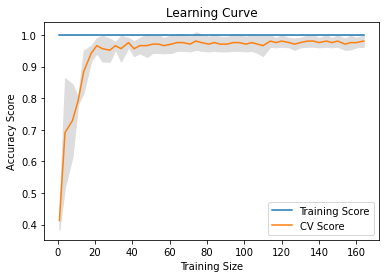

In [3]:
## Random Forest: Fit and Evaluate
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

tr_features = pd.read_csv('train_features.csv')
tr_labels = pd.read_csv('train_labels.csv')
#Write method to print results
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 250],
    'max_depth': [2, 4, 8, 16, 32, None]
}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)
train_sizes, train_scores, test_scores = learning_curve(rf, tr_features, tr_labels, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1, 50), verbose=1)
train_mean = np.mean(train_scores, axis=1)
train_mean
train_std = np.std(train_scores, axis=1)
train_std
test_mean = np.mean(test_scores, axis=1)
test_mean
test_std = np.std(test_scores, axis=1)
test_std
plt.plot(train_sizes, train_mean, label = 'Training Score')
plt.plot(train_sizes, test_mean, label = 'CV Score')

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='#DDDDDD')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='#DDDDDD')

plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
plt.legend(loc = 'best')